In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#課題データ
data = np.array([[1, 0.2, 0.8, 1],
                 [1, 0.3, 0.2, -1],
                 [1, 0.7, 0.5, -1],
                 [1, 0.4, 0.7, 1],
                 [1, 0.3, 0.9, 1],
                 [1, 0.6, 0.3, -1]
                ])

x = data[:,1:3] #2,3列目をxに代入
t = data[:,3] #4列目をyに代入#課題データ

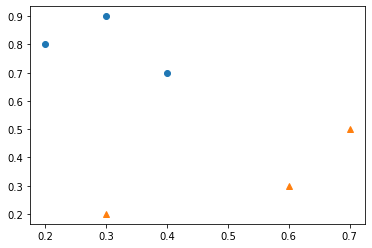

In [22]:
#グラフ表示
plt.plot(x[t == 1, 0], x[t == 1, 1], 'o')
plt.plot(x[t == -1, 0], x[t == -1, 1], '^')

In [23]:
from sklearn.linear_model import Perceptron

In [24]:
#最大繰り返し回数(max_iter)、学習率(eta0)でパーセプトロン作成
ppn = Perceptron(max_iter = 100000,eta0 = 0.1)
ppn.fit(data[:,1:3].reshape(-1,2), data[:,3])

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=100000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
#学習結果確認
print(ppn.coef_) #ウエイト
print(ppn.intercept_) #切片(w0)
print(ppn.n_iter_) #繰り返し回数
print(ppn.classes_) #分類されたクラス

[[-0.13  0.22]]
[-0.1]
9
[-1.  1.]


In [26]:
#結果の確認
y_pred = ppn.predict(data[:,1:3].reshape(-1,2))
print(y_pred) #各データの分類結果
print('Missclassified samples:%d'%(data[:,3] != y_pred).sum())

[ 1. -1. -1.  1.  1. -1.]
Missclassified samples:0


In [27]:
from sklearn.metrics import accuracy_score
#正解率の表示
print('Accuracy:%.2f'%accuracy_score(data[:,3],y_pred))

Accuracy:1.00


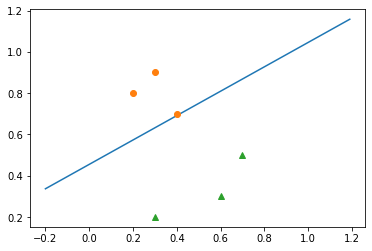

In [28]:
p = np.arange(-0.2, 1.2, 0.01)
q = -ppn.intercept_[0]/ppn.coef_[0][1] - ppn.coef_[0][0]/ppn.coef_[0][1]*p
plt.plot(p, q)
plt.plot(x[t == 1, 0], x[t == 1, 1], 'o')
plt.plot(x[t == -1, 0], x[t == -1, 1], '^')